Support Vector Classifier Implementation

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#Lets create a data points
from sklearn.datasets import make_classification

In [6]:
X,y = make_classification(n_samples=1000,n_features=2,n_clusters_per_class =2,n_redundant=0)

In [8]:
X

array([[-1.49151084,  1.20744191],
       [-0.03744436, -0.70315152],
       [ 0.09432161, -2.41824613],
       ...,
       [ 2.33584695, -1.52938131],
       [ 0.74333157, -0.38644318],
       [-2.88668904, -1.56079236]])

In [9]:
y

array([1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,

In [10]:
pd.DataFrame(X)[0]

0     -1.491511
1     -0.037444
2      0.094322
3      0.707732
4     -1.921166
         ...   
995    2.095915
996    1.625850
997    2.335847
998    0.743332
999   -2.886689
Name: 0, Length: 1000, dtype: float64

<Axes: xlabel='0', ylabel='1'>

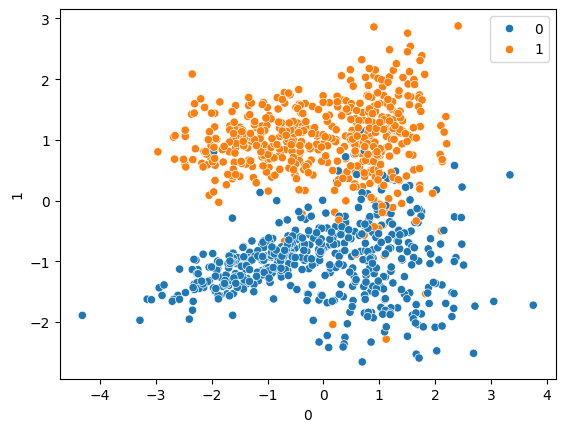

In [11]:
sns.scatterplot(x=pd.DataFrame(X)[0],y=pd.DataFrame(X)[1],hue=y)

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=10)

In [13]:
from sklearn.svm import SVC

In [14]:
svc =SVC(kernel='linear')

In [15]:
svc.fit(X_train,y_train)

SVC(kernel='linear')

In [17]:
svc.coef_  #theta1 and theta2

array([[-0.30316906,  2.32323421]])

In [18]:
#prediction
y_pred =svc.predict(X_test)

In [23]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [24]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.89      0.91       131
           1       0.89      0.92      0.91       119

    accuracy                           0.91       250
   macro avg       0.91      0.91      0.91       250
weighted avg       0.91      0.91      0.91       250

[[117  14]
 [  9 110]]
0.908


Hyperparameter tuning with svc

In [25]:
from sklearn.model_selection import GridSearchCV

#defining parameter range
param_grid ={'C':[0.1,1,10,100,1000],
             'gamma':[1,0.1,0.01,0.001,0.0001]
             }

In [26]:
grid = GridSearchCV(SVC(),param_grid,refit =True,cv=5,verbose=3)

In [27]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ....................C=0.1, gamma=1;, score=0.953 total time=   0.0s
[CV 2/5] END ....................C=0.1, gamma=1;, score=0.967 total time=   0.0s
[CV 3/5] END ....................C=0.1, gamma=1;, score=0.967 total time=   0.0s
[CV 4/5] END ....................C=0.1, gamma=1;, score=0.967 total time=   0.0s
[CV 5/5] END ....................C=0.1, gamma=1;, score=0.947 total time=   0.0s
[CV 1/5] END ..................C=0.1, gamma=0.1;, score=0.953 total time=   0.0s
[CV 2/5] END ..................C=0.1, gamma=0.1;, score=0.960 total time=   0.0s
[CV 3/5] END ..................C=0.1, gamma=0.1;, score=0.967 total time=   0.0s
[CV 4/5] END ..................C=0.1, gamma=0.1;, score=0.973 total time=   0.0s
[CV 5/5] END ..................C=0.1, gamma=0.1;, score=0.940 total time=   0.0s
[CV 1/5] END .................C=0.1, gamma=0.01;, score=0.953 total time=   0.0s
[CV 2/5] END .................C=0.1, gamma=0.01

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             verbose=3)

In [29]:
grid.best_params_

{'C': 1, 'gamma': 1}

In [31]:
#prediction
y_predict_ = grid.predict(X_test)
print(classification_report(y_test,y_predict_))
print(confusion_matrix(y_test,y_predict_))
print(accuracy_score(y_test,y_predict_))

              precision    recall  f1-score   support

           0       0.94      0.90      0.92       131
           1       0.90      0.93      0.91       119

    accuracy                           0.92       250
   macro avg       0.92      0.92      0.92       250
weighted avg       0.92      0.92      0.92       250

[[118  13]
 [  8 111]]
0.916
